<a href="https://colab.research.google.com/github/trushpatel97/ColabResearch/blob/master/EyeDiseaseDetection_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **Eye Disease Detection**

**Steps taken to solve problem**
* Step 1: Import common libraries
* Step 2: Setup GPU
* Step 3: Getting the data
* Step 4: Build/Train a CNN
* Step 5: Fit the data
* Step 6: Improve the model
* Step 7: Fit improved model
* Step 8: Save the model
* Step 9: Presenting results visually


## **Global variables/Hyperparameters**

---



In [3]:
Image_height = 224
Image_width = 224
val_split = 0.20
batches_size = 16
lr = 0.0005
spe = 220
vs = 32
epoch = 6

## **Step 1: Import common libraries**

---



In [4]:
#Common machine learning libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
#Used for setting up GPU and image classifcation
import tensorflow as tf
import tensorflow_hub as hub 

#Used for seeing how many images we have within each folder
import os

#Used for split / viewing images later on
import glob

#Libraries needed for image classification
from tensorflow import keras 
from keras.optimizers import Adam,Adamax
from tensorflow.python.keras.layers import Input, Activation, Conv2D, MaxPool2D,MaxPooling2D, BatchNormalization, UpSampling2D, Lambda
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.applications import imagenet_utils


## **Step 2: Setup GPU**

---



In [5]:
print("GPU is working" if tf.config.list_physical_devices("GPU") else " GPU is not working. Please change the runtime to use GPU")

GPU is working


## **Step 3: Getting Data**

---



In [6]:
# Getting the file of the training set and testing set
train_folder = "/content/drive/My Drive/Research/train"
test_folder = "/content/drive/My Drive/Research/test"

In [8]:
#Code to iterate over all the files (Sub directories included). This will be used to see how many training and images we have
CNV_train = os.listdir("/content/drive/My Drive/Research/train/CNV")
DME_train = os.listdir("/content/drive/My Drive/Research/train/DME")
DRUSEN_train = os.listdir("/content/drive/My Drive/Research/train/DRUSEN")
NORMAL_train = os.listdir("/content/drive/My Drive/Research/train/NORMAL")

CNV_test = os.listdir("/content/drive/My Drive/Research/test/CNV") 
DME_test = os.listdir("/content/drive/My Drive/Research/test/DME")
DRUSEN_test = os.listdir("/content/drive/My Drive/Research/test/DRUSEN")
NORMAL_test = os.listdir("/content/drive/My Drive/Research/test/NORMAL")

total_training = len(CNV_train + DME_train + DRUSEN_train + NORMAL_train)
total_testing = len(CNV_test + DME_test + DRUSEN_test + NORMAL_test)

print("We have",total_training, "total images in the training folder and", total_testing, "images in the testing folder")
print(f"Allocating {(1-val_split)*100}% for training {val_split*100}% for validation on the training set we get:")
print(total_training*(1-val_split), "images for training")
print(total_training*(val_split), "images for validation")

We have 83484 total images in the training folder and 1000 images in the testing folder
Allocating 80.0% for training 20.0% for validation on the training set we get:
66787.2 images for training
16696.8 images for validation


In [9]:
#Creating batches
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,validation_split=val_split) \
    .flow_from_directory(directory=train_folder, target_size=(Image_height,Image_width), classes=['CNV','DME','DRUSEN','NORMAL'], batch_size=batches_size,class_mode="categorical",
                              subset="training")
validation_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,validation_split=val_split) \
    .flow_from_directory(directory=train_folder, target_size=(Image_height,Image_width), classes=['CNV','DME','DRUSEN','NORMAL'], batch_size=batches_size,class_mode="categorical",
                              subset="validation")
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
                       .flow_from_directory(test_folder, target_size=(Image_height,Image_width), 
                         classes=['CNV','DME','DRUSEN','NORMAL'], batch_size=batches_size,class_mode="categorical")

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


## **Step 4: Build/Train a CNN**

---



In [ ]:
#building the model to train a CNN. This will be used to extract features of images
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(Image_height,Image_width,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=4, activation='softmax')
])

In [ ]:
#Checking the models summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 194, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 97, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 95, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 219584)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 878340    
Total params: 897,732
Trainable params: 897,732
Non-trainable params: 0
__________________________________________________

## **Step 5: Fit the data**
---




In [ ]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fitting the data
model.fit(train_batches, steps_per_epoch = spe, epochs = epoch, 
            validation_data = vs, validation_steps = vs,shuffle = True)

Epoch 1/10
128/128 [==============================] - 1893s 15s/step - loss: 6.1900 - accuracy: 0.4561 - val_loss: 3.1588 - val_accuracy: 0.4326
Epoch 2/10
128/128 [==============================] - 1604s 13s/step - loss: 1.9485 - accuracy: 0.5793 - val_loss: 1.3147 - val_accuracy: 0.6201
Epoch 3/10
128/128 [==============================] - 1464s 11s/step - loss: 1.0720 - accuracy: 0.6740 - val_loss: 1.1694 - val_accuracy: 0.6445
Epoch 4/10
128/128 [==============================] - 1444s 11s/step - loss: 0.9682 - accuracy: 0.6892 - val_loss: 0.9238 - val_accuracy: 0.6865
Epoch 5/10
128/128 [==============================] - 1289s 10s/step - loss: 0.7701 - accuracy: 0.7217 - val_loss: 0.8793 - val_accuracy: 0.7012
Epoch 6/10
128/128 [==============================] - 1331s 10s/step - loss: 0.6729 - accuracy: 0.7637 - val_loss: 0.7865 - val_accuracy: 0.7178
Epoch 7/10
128/128 [==============================] - 1155s 9s/step - loss: 0.6316 - accuracy: 0.7793 - val_loss: 0.7348 - val_acc

## Step 6: Save the model

In [ ]:
model.save("CNN.h5")

## Step 7: Improve the model

### VGG16 Model

In [ ]:
#Function to create model. We will be using a pretrained model
def create():
  vgg16_model = keras.applications.vgg16.VGG16(input_tensor=Input(shape=(Image_height, Image_width, 3)),input_shape=(Image_height,Image_width,3), include_top = False)
  model = Sequential()
  model.add(vgg16_model)
  for layer in model.layers:
    layer.trainable = False
  model.add(Flatten())
  model.add(Dense(4, activation='softmax'))
  return model

In [ ]:
model = model.create()
model.compile(Adam(lr=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(train_batches, steps_per_epoch=spe,
                    validation_data=validation_batches_10,validation_steps=vs, epochs=epoch)

In [ ]:
model.save("VGG16_model.h5")

### Xception Model

In [ ]:
def create():
  xception_model = tf.keras.applications.Xception(input_tensor=Input(shape=(Image_height, Image_width, 3)),input_shape=(Image_height,Image_width,3), include_top = False)
  model = Sequential()
  model.add(xception_model)
  for layer in model.layers:
    layer.trainable = False
  model.add(Flatten())
  model.add(Dense(4, activation='softmax'))
  return model

In [ ]:
model = create()
model.compile(Adam(lr=lr),loss="categorical_crossentropy",metrics=['accuracy'])

83689472/83683744 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 6, 10, 2048)       20861480  
_________________________________________________________________
flatten_5 (Flatten)          (None, 122880)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 491524    
Total params: 21,353,004
Trainable params: 491,524
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model.fit(train_batches, steps_per_epoch=spe,
                    validation_data=validation_batches,validation_steps=vs, epochs=epoch)

Epoch 1/10
512/512 [==============================] - 5606s 11s/step - loss: 7.4320 - accuracy: 0.5426 - val_loss: 8.0523 - val_accuracy: 0.4859
Epoch 2/10
512/512 [==============================] - 5079s 10s/step - loss: 6.7518 - accuracy: 0.5625 - val_loss: 7.8662 - val_accuracy: 0.6047
Epoch 3/10
512/512 [==============================] - 4459s 9s/step - loss: 7.1621 - accuracy: 0.5709 - val_loss: 8.9813 - val_accuracy: 0.5594
Epoch 4/10
512/512 [==============================] - 4002s 8s/step - loss: 7.1249 - accuracy: 0.5852 - val_loss: 10.5663 - val_accuracy: 0.5512
Epoch 5/10
512/512 [==============================] - 3659s 7s/step - loss: 7.0733 - accuracy: 0.5764 - val_loss: 8.5909 - val_accuracy: 0.5840
Epoch 6/10
512/512 [==============================] - ETA: 0s - loss: 6.5823 - accuracy: 0.6037

In [ ]:
model.save("Xception.h5")

### MobileNet Model

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet(include_top=False,
                                                           input_shape=(224, 224,3),
                                                           pooling='max', weights='imagenet',
                                                           alpha=1, depth_multiplier=1,dropout=.5)

In [ ]:
x=mobile.layers[-1].output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
predictions=Dense (4, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)    
for layer in model.layers:
    layer.trainable=True
model.compile(Adamax(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Research/ModelCheckpoint", monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch', options=None)
lr_adjust=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=1, verbose=0, mode="auto",
    min_delta=0.00001,  cooldown=0,  min_lr=0) 
callbacks=[checkpoint, lr_adjust]

In [ ]:
model.fit(train_batches, steps_per_epoch=spe,
                    validation_data=validation_batches,validation_steps=vs, epochs=epoch)

In [ ]:
model.save("Mobilenet.h5")

## Step 8: Improve MobileNet Model

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet(include_top=False,
                                                           input_shape=(224, 224,3),
                                                           pooling='max', weights='imagenet',
                                                           alpha=1, depth_multiplier=1,dropout=.5)

In [ ]:
x=mobile.layers[-1].output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
predictions=Dense (4, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)    
for layer in model.layers:
    layer.trainable=True
model.compile(Adamax(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Research/ModelCheckpoint", monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch', options=None)
lr_adjust=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=1, verbose=0, mode="auto",
    min_delta=0.00001,  cooldown=0,  min_lr=0) 
callbacks=[checkpoint, lr_adjust]

In [ ]:
model.fit(train_batches, steps_per_epoch=spe,
                    validation_data=validation_batches,validation_steps=vs, epochs=epoch)

Epoch 1/6
220/220 [==============================] - 2952s 13s/step - loss: 0.5842 - accuracy: 0.7912 - val_loss: 0.7926 - val_accuracy: 0.7988
Epoch 2/6
220/220 [==============================] - 2736s 12s/step - loss: 0.4041 - accuracy: 0.8723 - val_loss: 0.3094 - val_accuracy: 0.9023
Epoch 3/6
220/220 [==============================] - 2635s 12s/step - loss: 0.3718 - accuracy: 0.8804 - val_loss: 0.3871 - val_accuracy: 0.8906
Epoch 4/6
220/220 [==============================] - 2517s 11s/step - loss: 0.2904 - accuracy: 0.8980 - val_loss: 0.2863 - val_accuracy: 0.9160
Epoch 5/6
220/220 [==============================] - 2364s 11s/step - loss: 0.2779 - accuracy: 0.9057 - val_loss: 0.3500 - val_accuracy: 0.9238
Epoch 6/6
220/220 [==============================] - 2241s 10s/step - loss: 0.2839 - accuracy: 0.9068 - val_loss: 0.2202 - val_accuracy: 0.9355


In [ ]:
model.save("Mobilenet_v2.h5")#(Size of batches 16)

## **Step 9: Testing results**

---




In [19]:
#Load model if needed
model = keras.models.load_model('/content/Mobilenet_v2.h5')

In [20]:
model.compile(optimizer = 'adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
test_folder = "/content/drive/My Drive/Research/test"
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
                       .flow_from_directory(test_folder, target_size=(Image_height,Image_width), 
                         classes=['CNV','DME','DRUSEN','NORMAL'], batch_size=batches_size,class_mode="categorical")

Found 1000 images belonging to 4 classes.


In [21]:
predictions = model.predict(x=test_batches,verbose=0)

In [22]:
np.round(predictions)

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
# Predict the accuracy on the Test set
acc = model.evaluate_generator(test_batches, steps=len(test_batches), verbose=1)
print("Model Accuracy on Test Data", acc[1]*100)

63/63 [==============================] - 5s 73ms/step - loss: 0.1519 - accuracy: 0.9410
Model Accuracy on Test Data 94.0999984741211


Confusion matrix, without normalization
[[78 61 51 60]
 [73 62 53 62]
 [67 72 49 62]
 [85 57 42 66]]


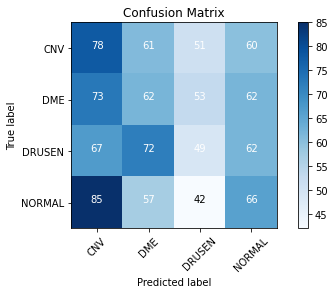

In [26]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['CNV','DME','DRUSEN','NORMAL']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')